In [2]:
#import statements

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import astropy
from astropy.time import Time
import datetime
import time

In [3]:
#function to parse through each file in file_names
def parsefile(file):
    time = []
    pressure = []
    # temp = []
    
    #'r' here is 'read' the file
    with open(file, 'r') as file:
        for line in file:
            if line.startswith('- ['):
                
                try:
                    numbers = line[3:].strip().split(', ')
                    time.append(float(numbers[0]))
                    pressure.append(float(numbers[3]))
                    # temp.append(float(numbers[6]))
                    
                #some lines in the file that start with a value and not '-' are excluded
                except ValueError:
                    continue
        
    return time, pressure  

In [4]:
#storing the directory names in a list
#sorted() - returns a sorted list of specified iterable object
directory_names = sorted(os.listdir('/home/rykore/weather_monitoring'))
print(directory_names)

['weatherstation-201207', 'weatherstation-201208', 'weatherstation-201209', 'weatherstation-201210', 'weatherstation-201211', 'weatherstation-201212', 'weatherstation-201301', 'weatherstation-201302', 'weatherstation-201303', 'weatherstation-201304', 'weatherstation-201305', 'weatherstation-201306', 'weatherstation-201307', 'weatherstation-201308', 'weatherstation-201309', 'weatherstation-201310', 'weatherstation-201311', 'weatherstation-201312', 'weatherstation-201401', 'weatherstation-201402', 'weatherstation-201403', 'weatherstation-201404', 'weatherstation-201405', 'weatherstation-201406', 'weatherstation-201407', 'weatherstation-201408', 'weatherstation-201409', 'weatherstation-201410', 'weatherstation-201411', 'weatherstation-201412', 'weatherstation-201501', 'weatherstation-201502', 'weatherstation-201503']


/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/Ubuntu_20.04_x86_64/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 176 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/Ubuntu_20.04_x86_64/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1440 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/Ubuntu_20.04_x86_64/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1352 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/Ubuntu_20.04_x86_64/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1441 of "dubious year (Note 4)"
  warnings.warn('ERFA func

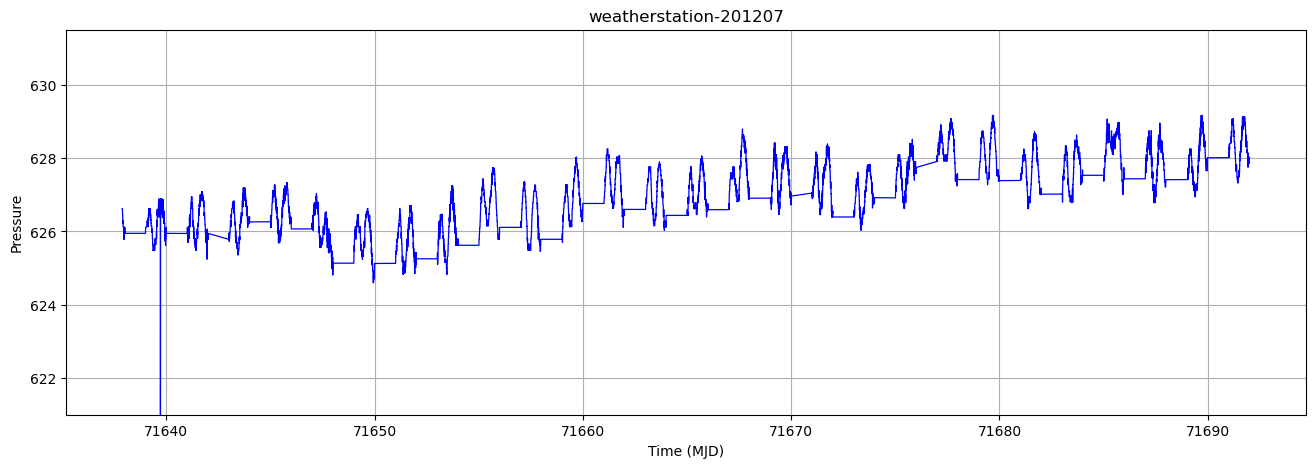

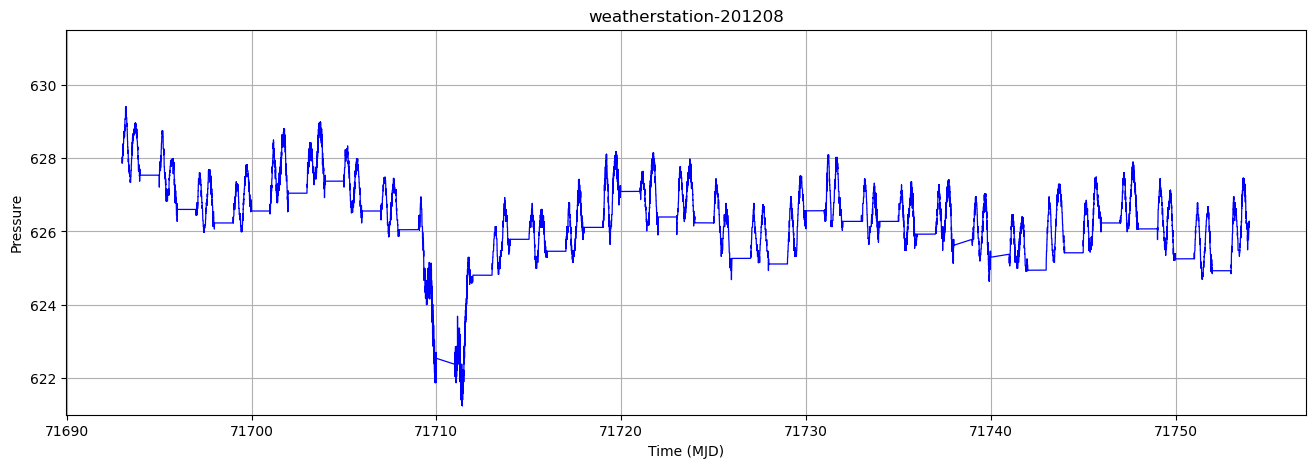

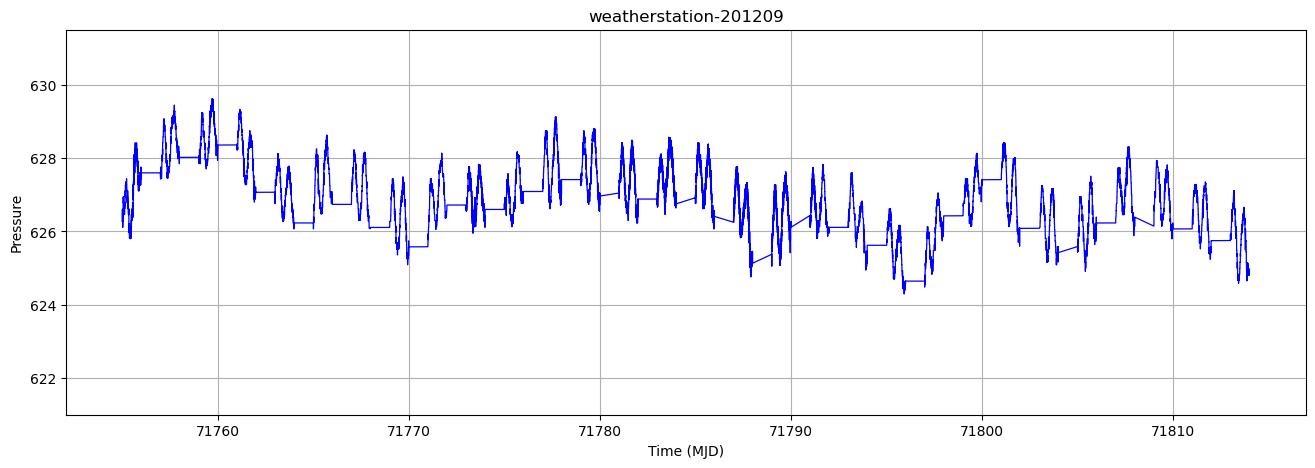

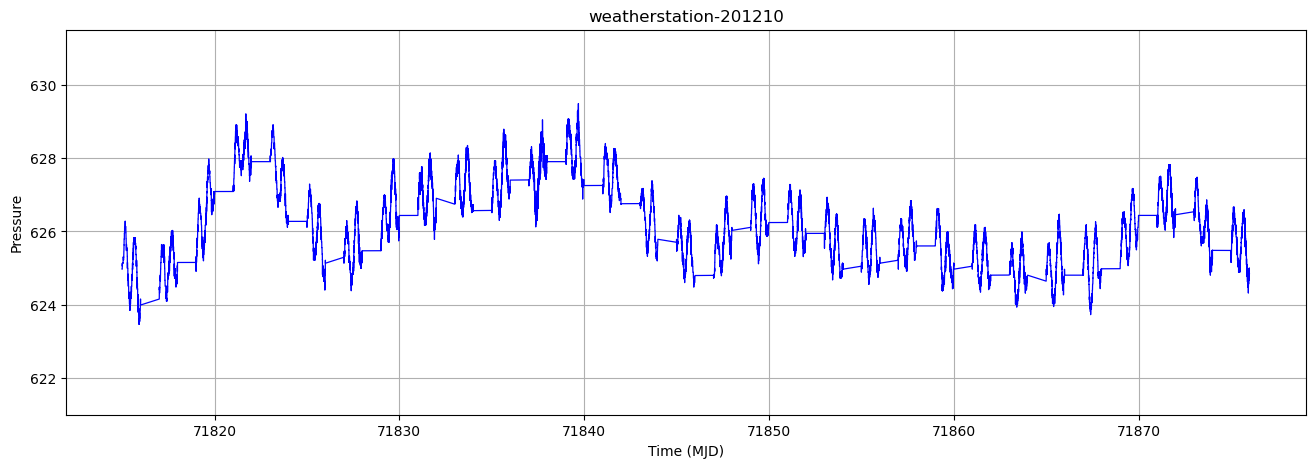

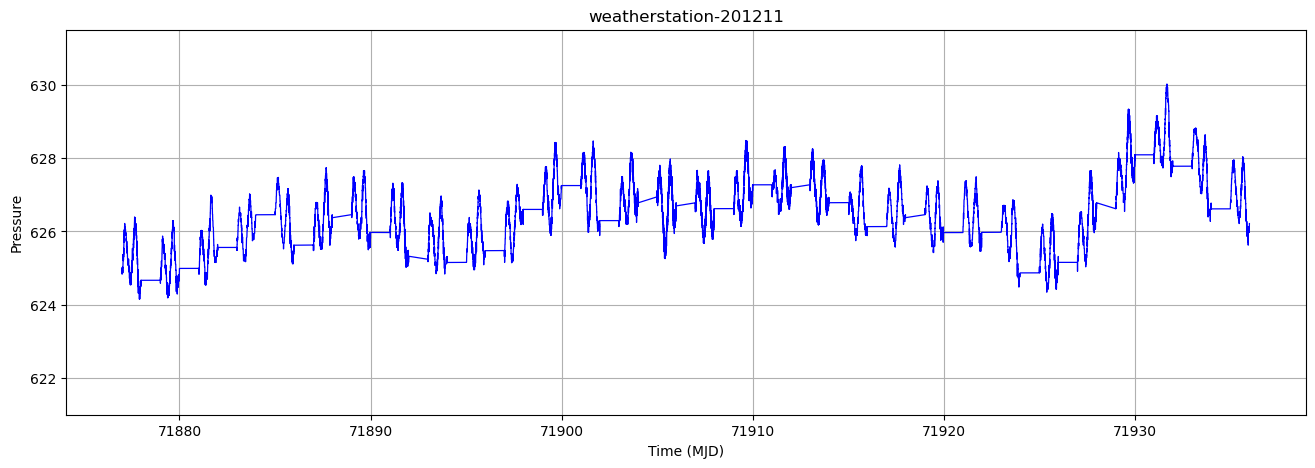

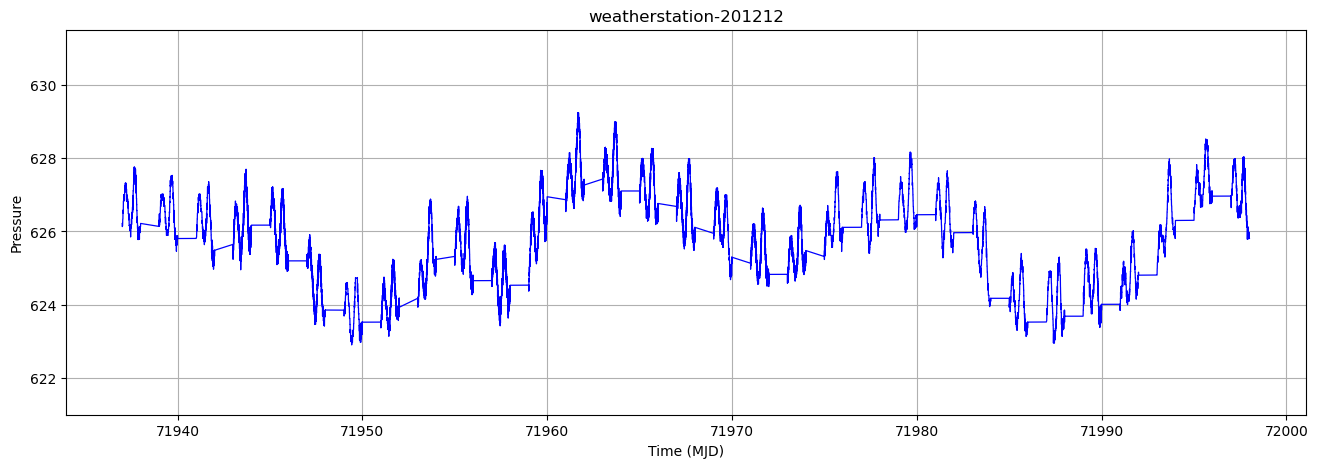

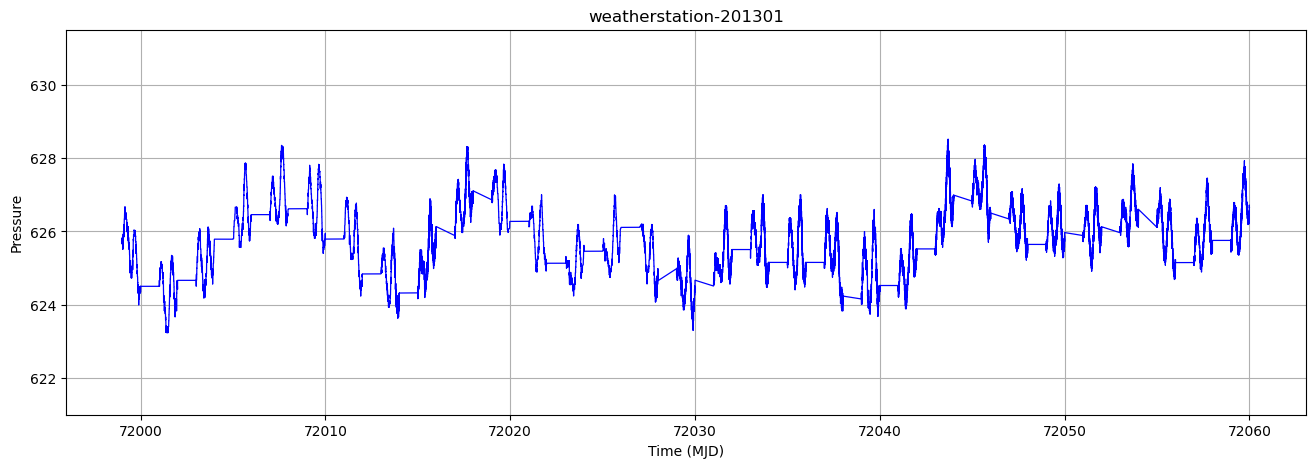

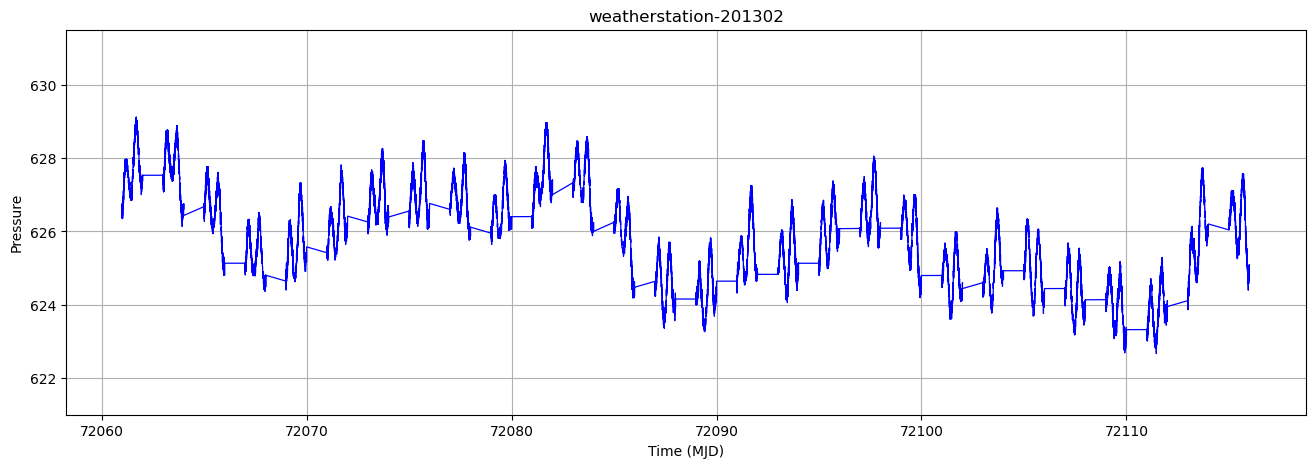

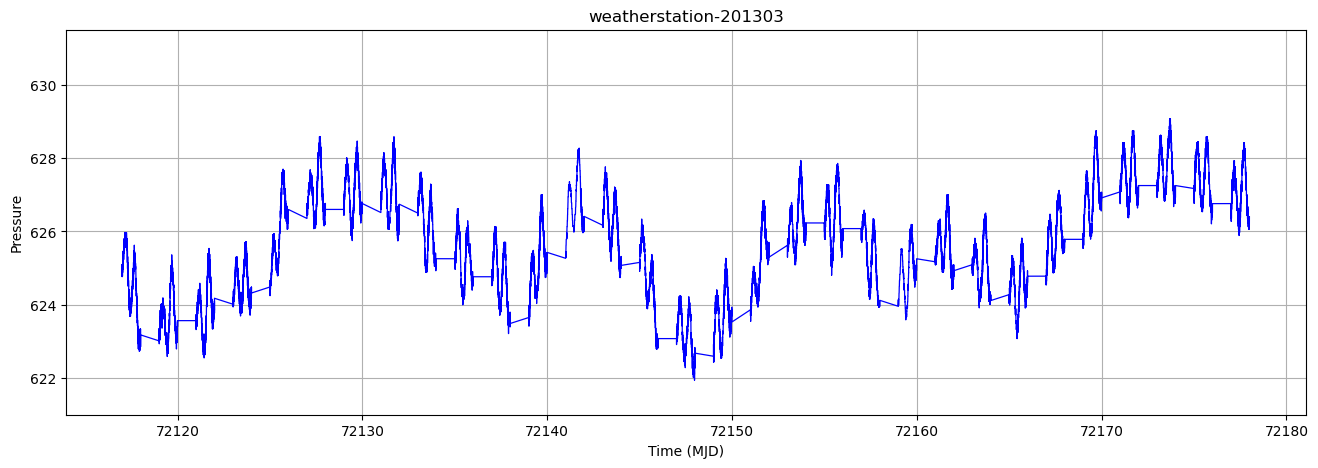

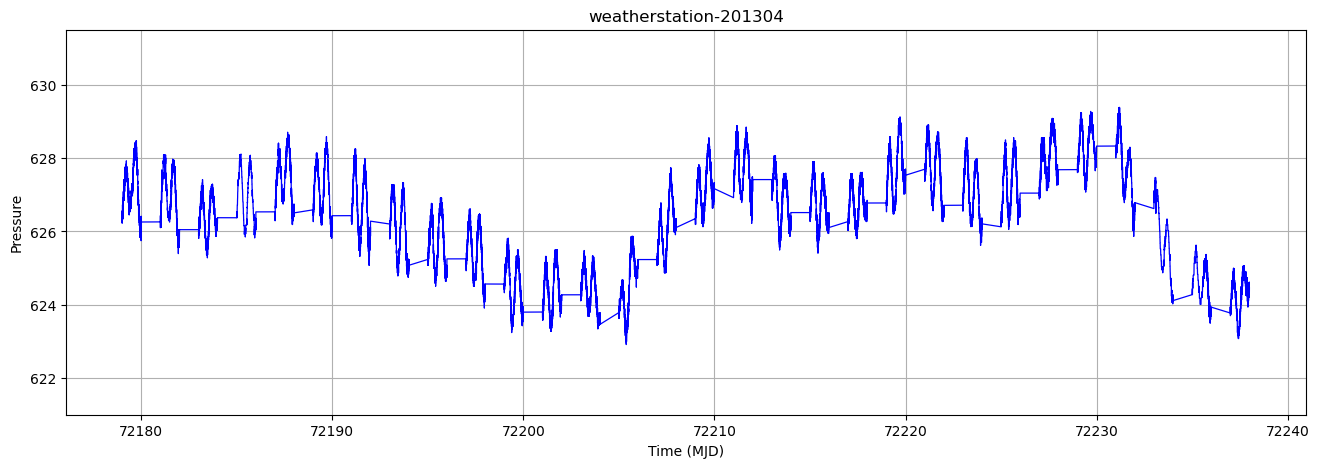

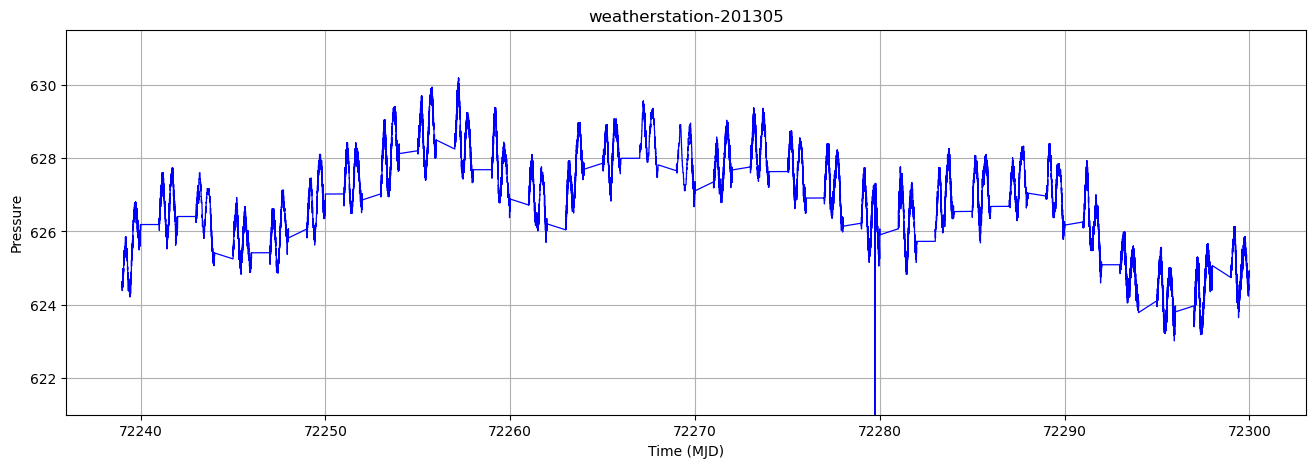

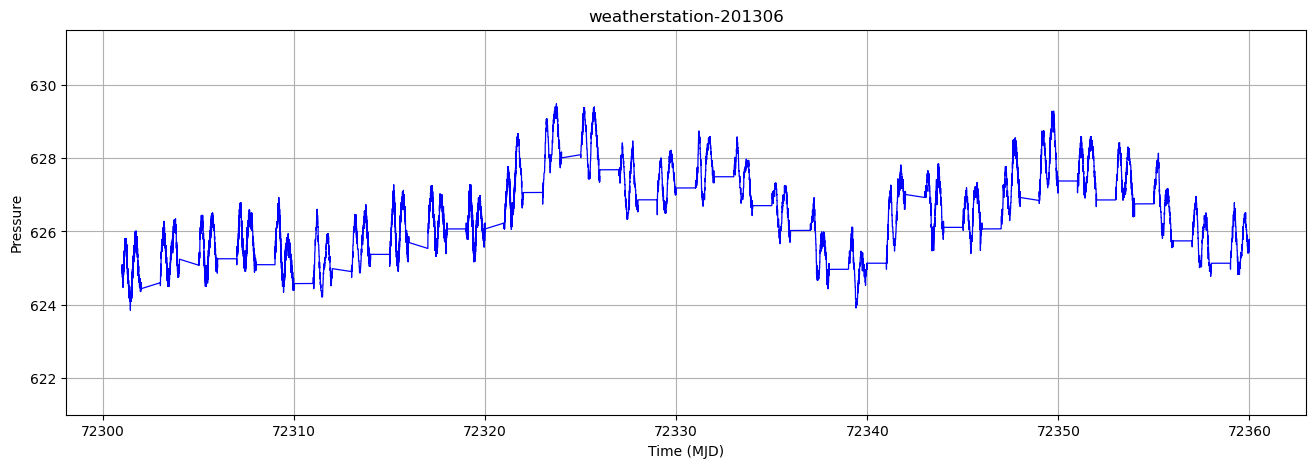

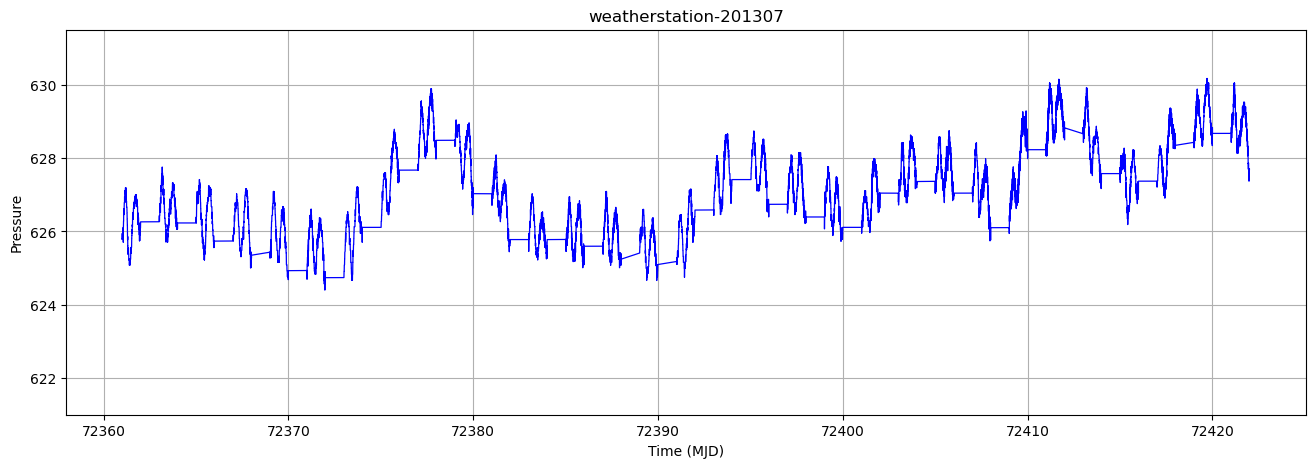

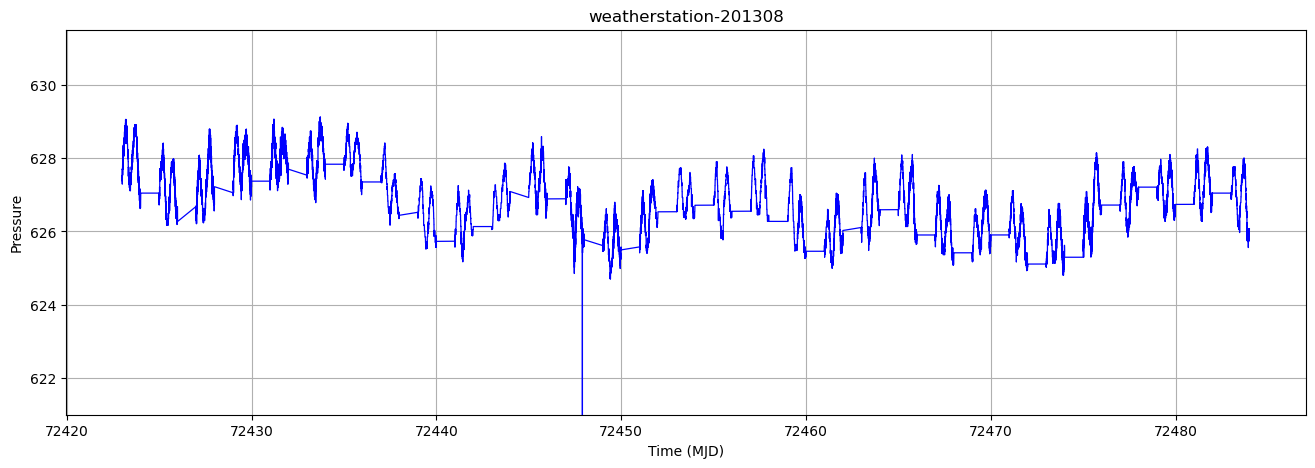

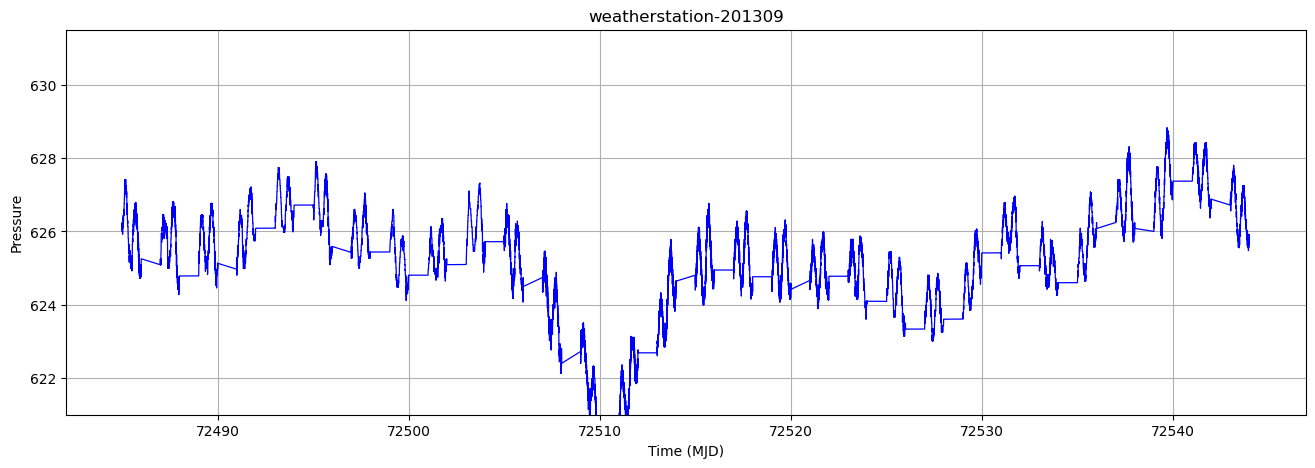

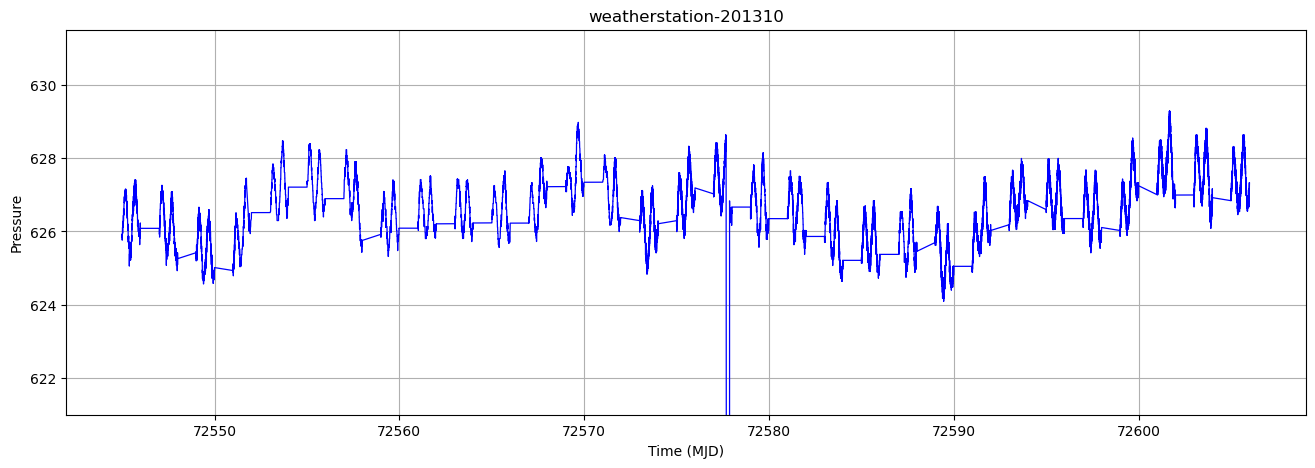

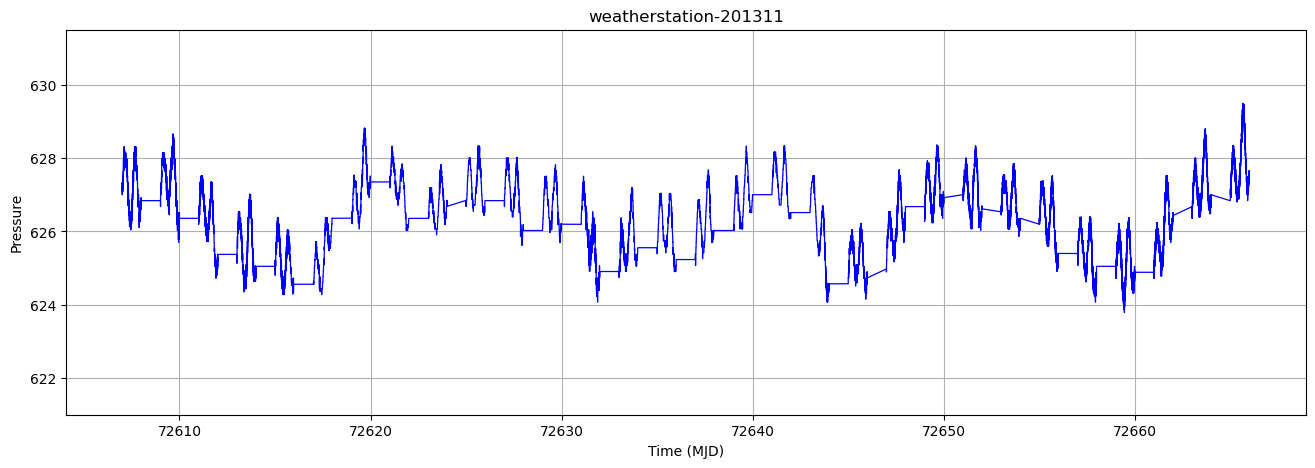

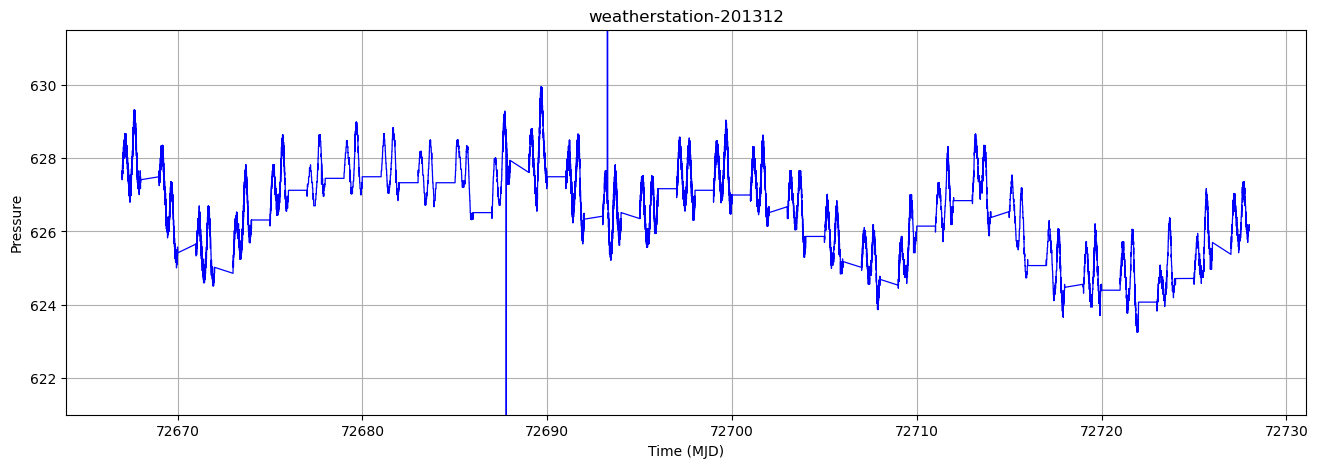

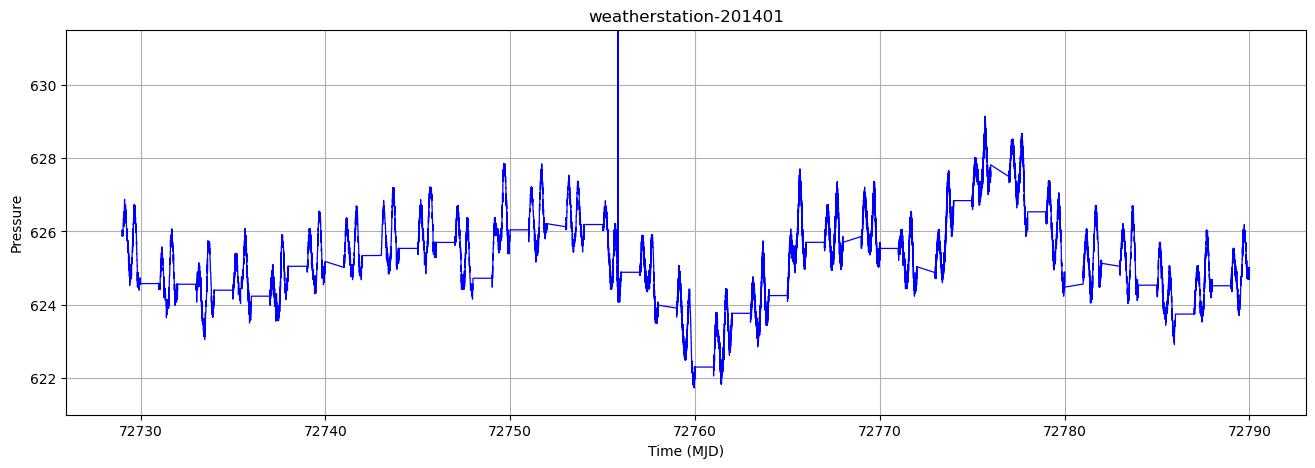

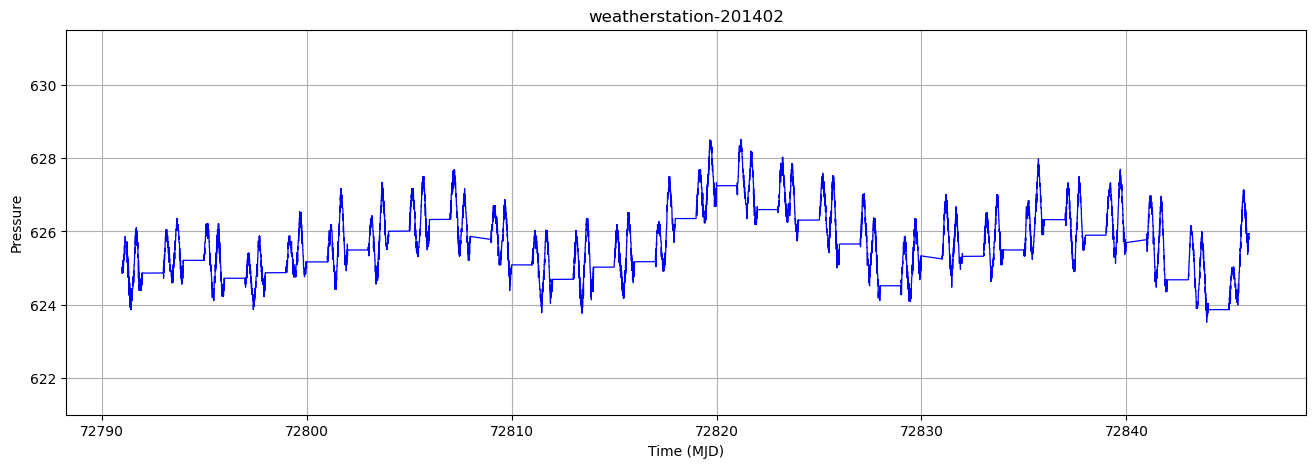

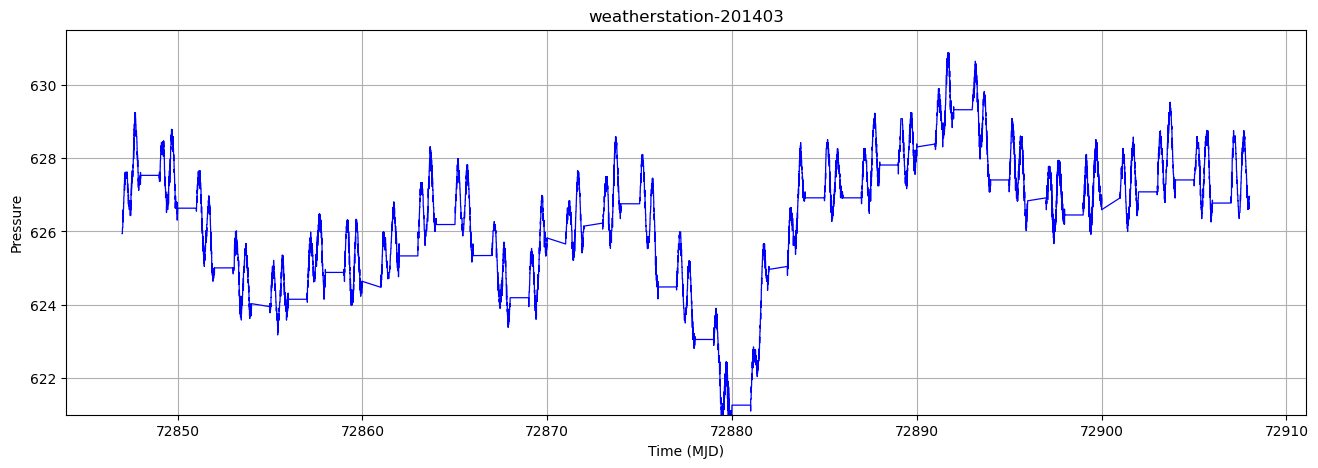

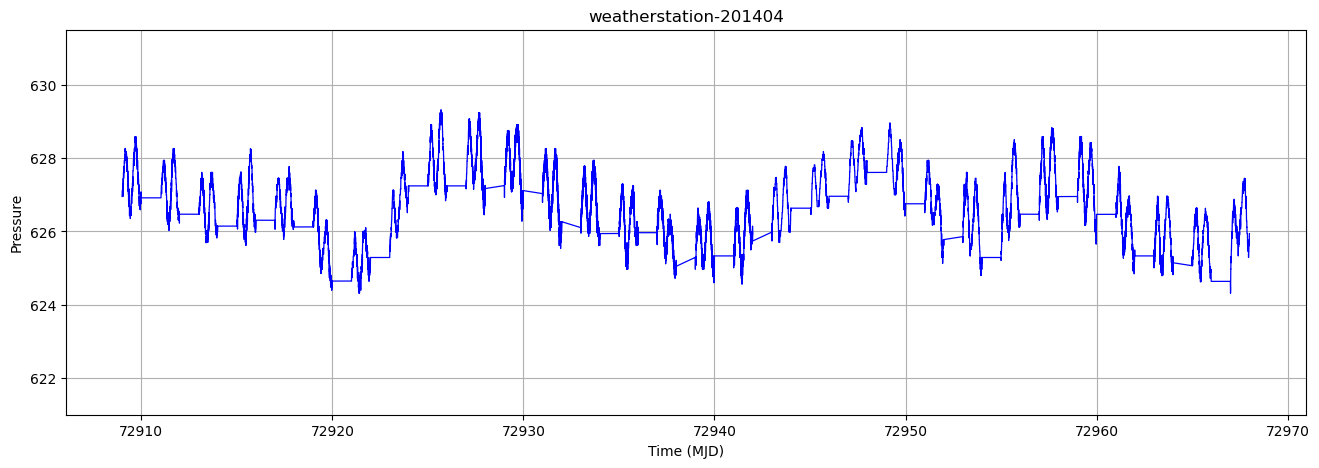

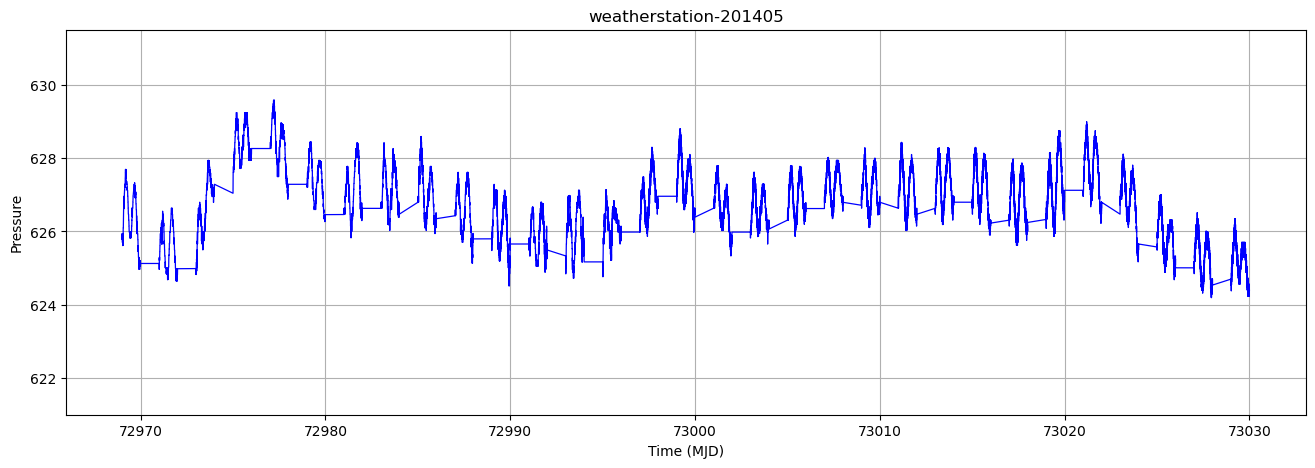

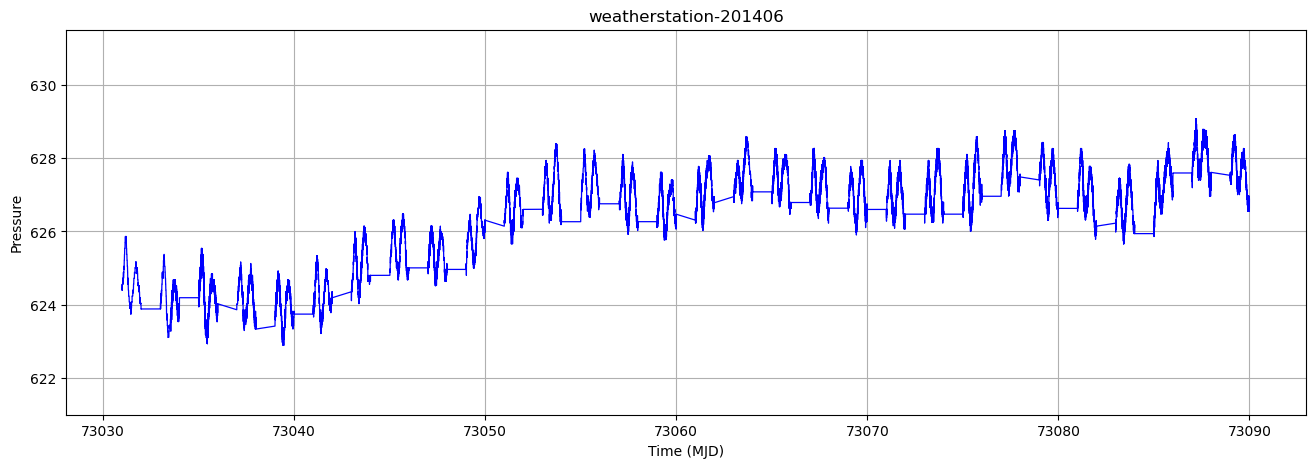

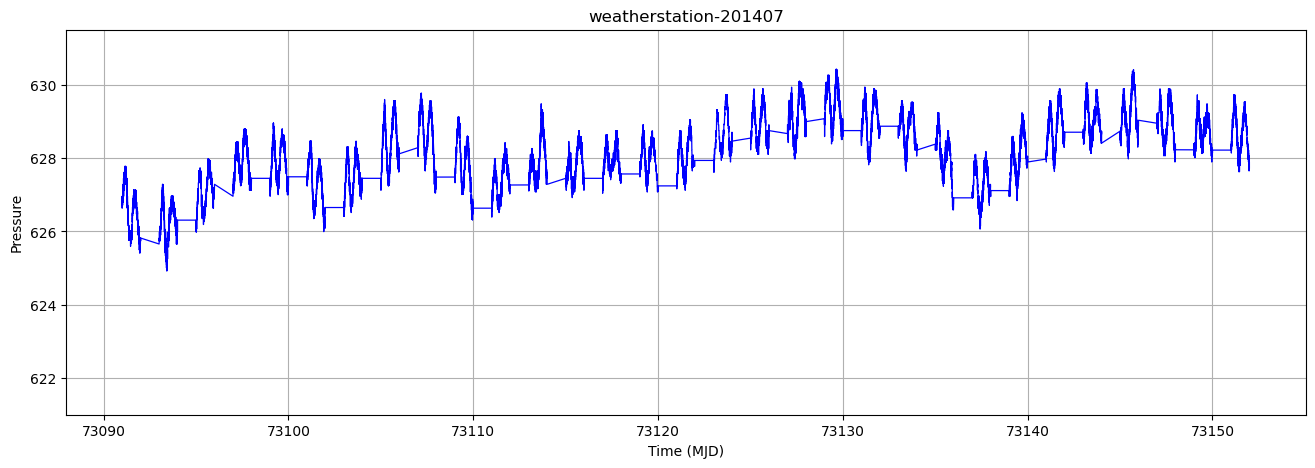

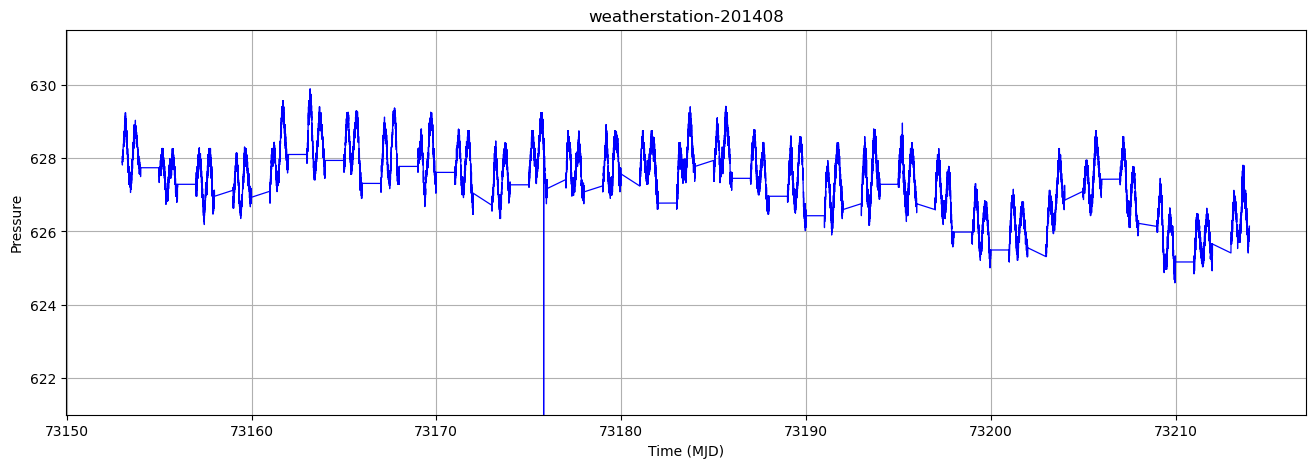

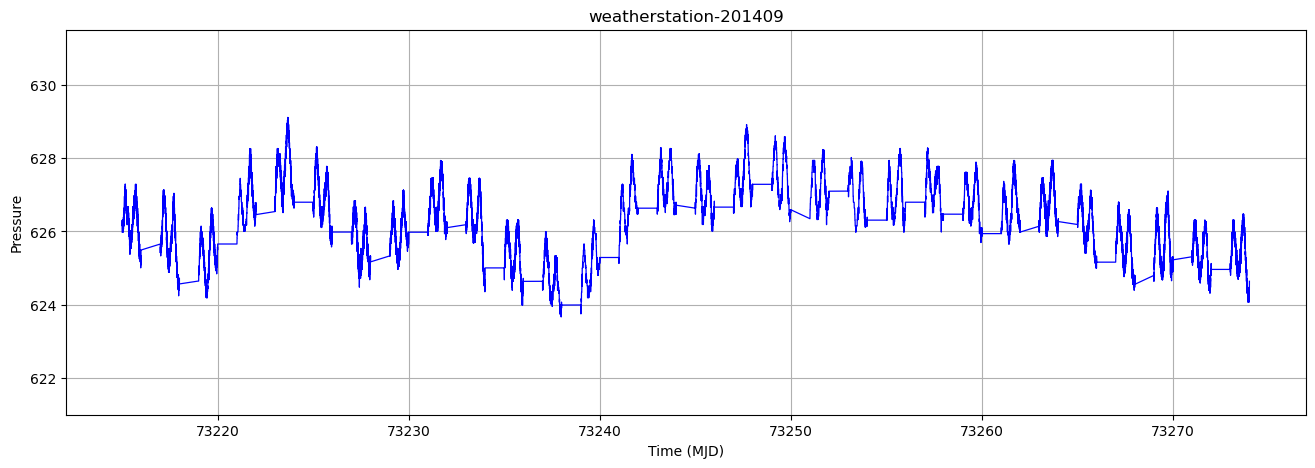

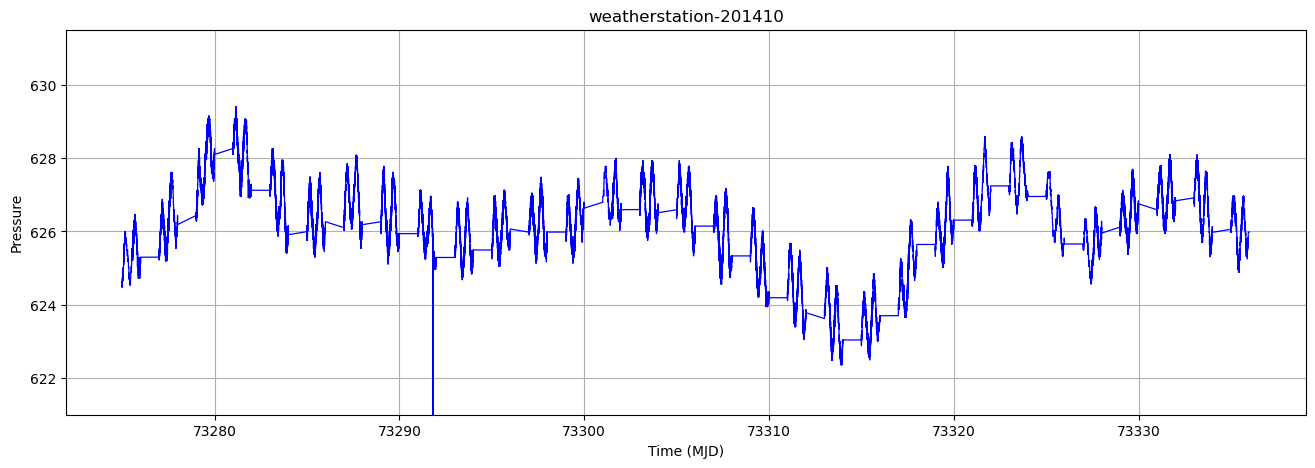

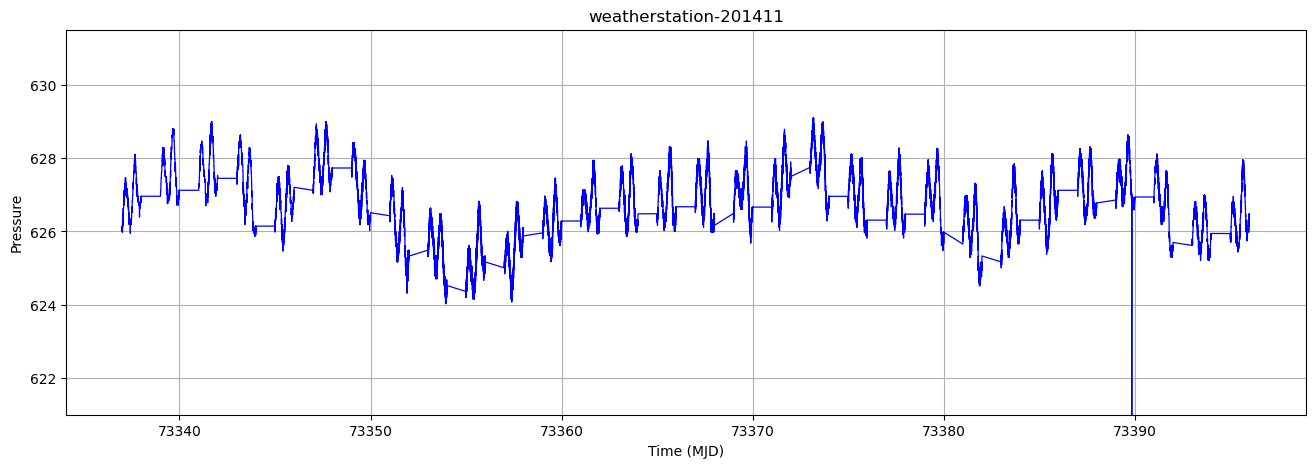

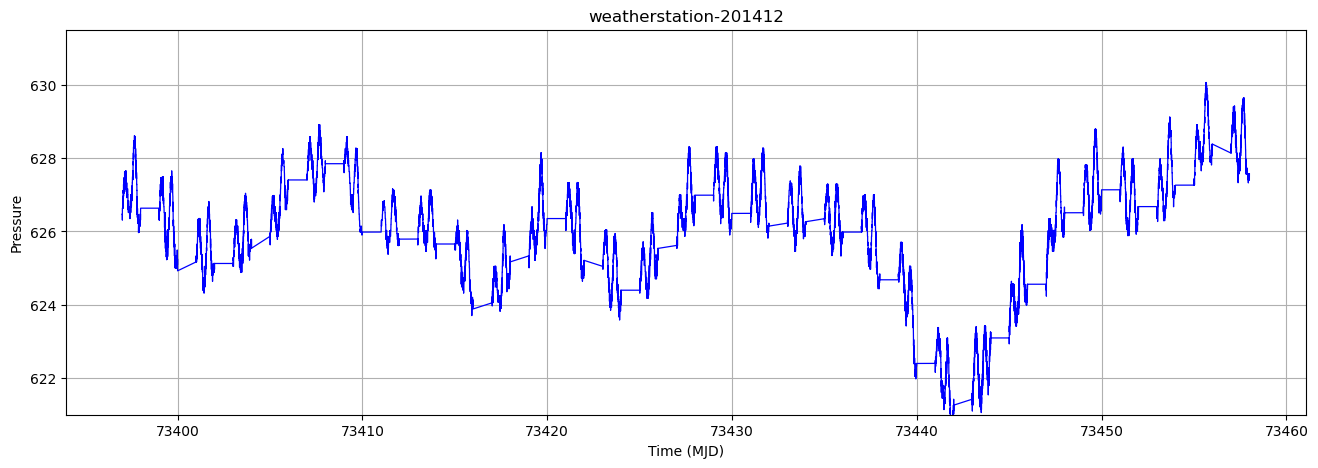

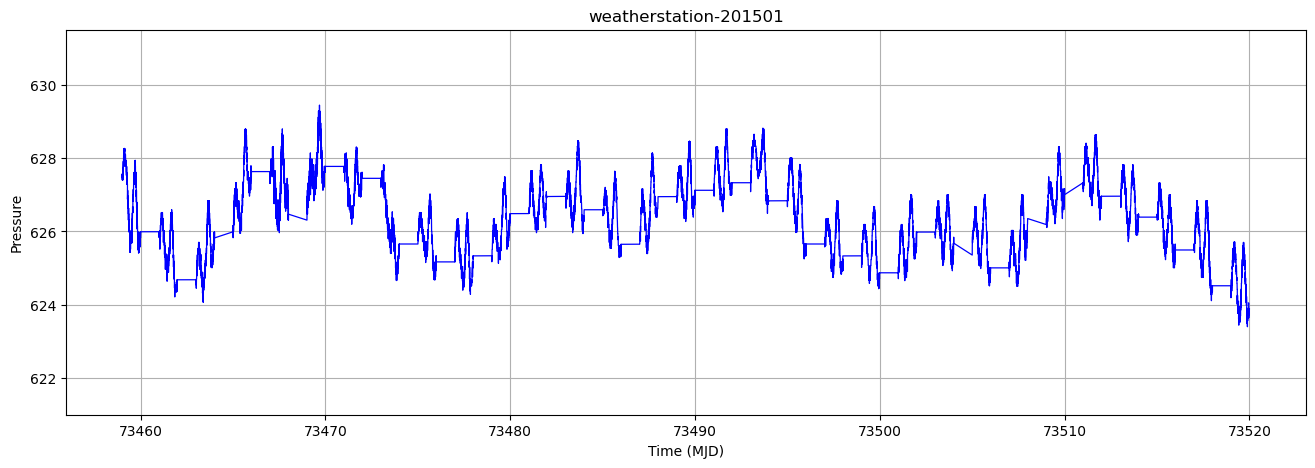

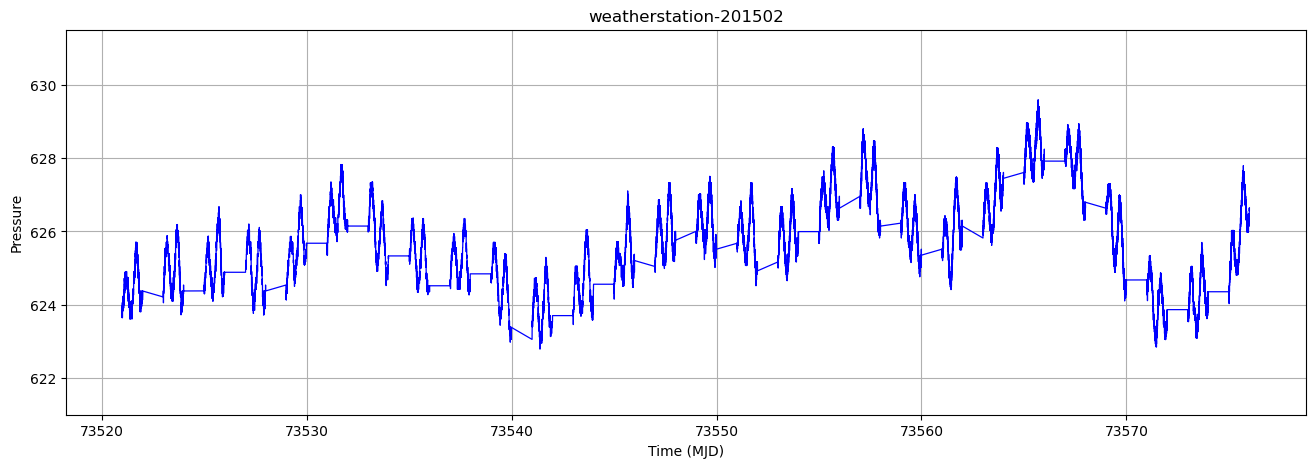

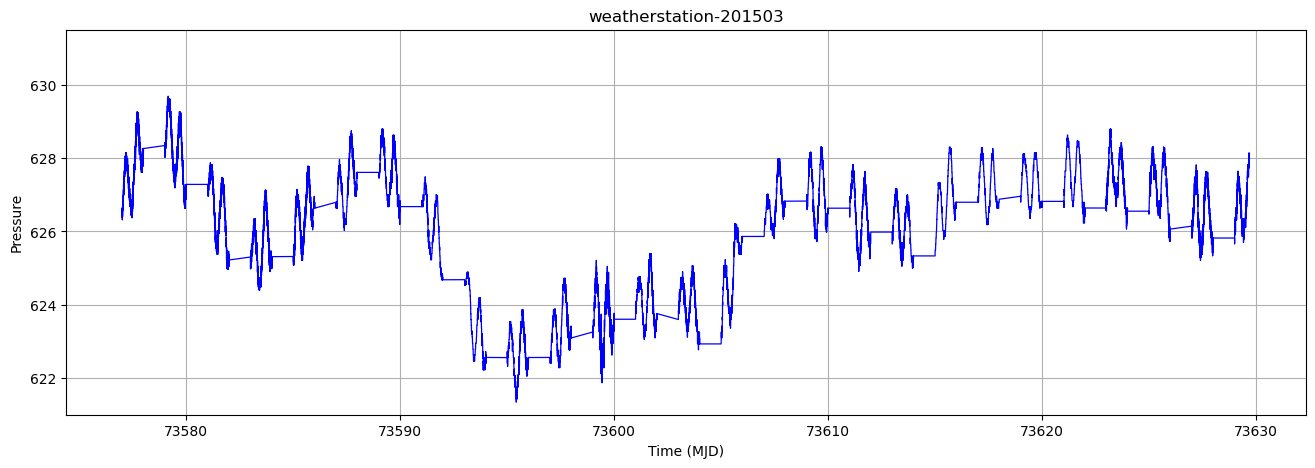

In [25]:
month_time_arrays = []
month_pressure_arrays = []

for directory_name in directory_names:
    file_path = '/home/rykore/weather_monitoring/{0}'.format(directory_name)
    file_names = sorted(os.listdir(file_path))
    
    month_time_array = []
    month_pressure_array = []
    
    for file_name in file_names:
        
        path = os.path.join(file_path, file_name)
        
        time_struct = Time.strptime(file_name, 'weatherstation-%Y%m%d.dat')
        t0 = astropy.time.Time(time_struct)
        
        if os.path.isfile(path):
            data = parsefile(path)
            t = t0 + astropy.time.TimeDelta(data[0], format='sec')
            
            #converting time array into the mjd scale
            time_array = t.to_value('mjd', 'long')
            pressure_array = np.array(data[1])
            
            #to make sure that time_array and pressure_array have the same length
            min_length = min(len(time_array), len(pressure_array))
            time_array = time_array[:min_length]
            pressure_array = pressure_array[:min_length]
            
            month_time_array.append(time_array)
            month_pressure_array.append(pressure_array)
            
    month_time_arrays.append(np.concatenate(month_time_array))
    month_pressure_arrays.append(np.concatenate(month_pressure_array))
    
for month_idx, month_name in enumerate(directory_names):
    plt.figure(figsize=(16, 5))
    plt.plot(month_time_arrays[month_idx], month_pressure_arrays[month_idx], 'b',linewidth = 0.9)
    plt.ylim(621,631.5)
    plt.title(month_name)
    plt.xlabel('Time (MJD)')
    plt.ylabel('Pressure')
    plt.grid()
    plt.show()

In [18]:
#same code as above but for individual days instead of combining them in a month

time_arrays = []
pressure_arrays = []

for directory_name in directory_names:
    file_path = '/home/rykore/weather_monitoring/{0}'.format(directory_name)
    
    #storing all the .dat file names in a list
    file_names = sorted(os.listdir(file_path))
    # t = Time.strptime('23:59:60 30 June 2015', '%H:%M:%S %d %B %Y')
    
    fig, axes = plt.subplots(len(file_names),1, figsize = (8,6*len(file_names)))
    # axes = axes.flatten()
    
    for index, file_name in enumerate(file_names):
        
        # path = file_path + '/{0}'.format(j)
        path = os.path.join(file_path, file_name)
        
        time_struct = Time.strptime(file_name, 'weatherstation-%Y%m%d.dat')
        
        #initial time
        t0 = astropy.time.Time(time_struct)
        # t0 = Time.strptime(j, 'weatherstation-%Y%m%d.dat')
        # t0 = astropy.time.TimeDelta(s,format='sec')
        
        
        if os.path.isfile(path):
            data = parsefile(path)
            t = t0 + astropy.time.TimeDelta(data[0],format='sec')
            
            time_array = t.to_value('mjd','long')
            pressure_array = np.array(data[1])
            
            time_arrays.append(time_array)
            pressure_arrays.append(pressure_array)
            
            axes[index].plot(time_array, pressure_array, 'b')
            axes[index].set_title(file_name)
            #add the correct title
            #add the correct x axis and y axis labels
            
            
            # time_array = np.array(data[0],t.to_value('mjd', 'long'))
            # pressure_array = np.array(data[1])
            # pressure_array = np.concatenate((pressure_array, np.array(data[1])), axis = 0)
            # temp_array = np.array(data[2])
            # t = t0 + astropy.time.TimeDelta(data[0],format='sec')
            # time_array = np.concatenate((time_array, t.to_value('mjd', 'long')), axis = 0)
            
            #use concatonate to combine all the data
            #touple
            
            # fig, axes = plt.subplots(len()figsize = (20,10))
            
            # axes[j].plot(time_array, pressure_array, 'b', figsize = (8,6))
            
    plt.tight_layout()
    plt.show()
            
            
# print(time_array)            
# plt.plot(time_array, pressure_array, linewidth = 1.1)
# plt.title('{0}'.format(i) + '/' + '{0}'.format(j))
# plt.show()        
            

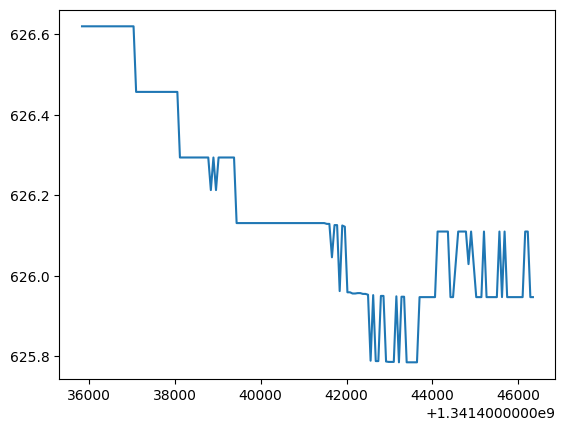

In [21]:
#sample code to check

data = parsefile('/home/rykore/weather_monitoring/weatherstation-201207/weatherstation-20120704.dat')
time_array = np.array(data[0])
pressure_array = np.array(data[1])

# print(time_array)
# print(pressure_array)

plt.plot(time_array,pressure_array)
plt.show()

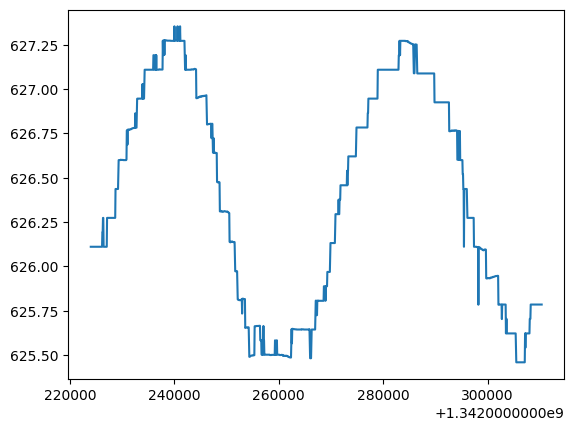

In [23]:
#another sample code to check
#the time axis is not in mjd (modified julian day)

data = parsefile('/home/rykore/weather_monitoring/weatherstation-201207/weatherstation-20120714.dat')
time_array = np.array(data[0])
pressure_array = np.array(data[1])

# print(time_array)
# print(pressure_array)

plt.plot(time_array,pressure_array)
plt.show()